In [2]:
import tensorflow as tf
import keras
import numpy as np
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import matplotlib.pyplot as plt
from keras.models import Sequential

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train, x_test = x_train / 255, x_test / 255

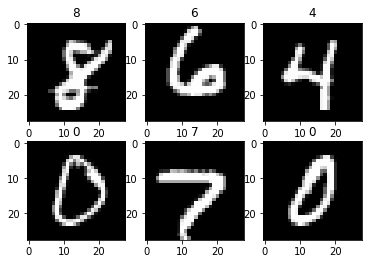

In [7]:
for i in range(0, 6):
    idx = np.random.randint(0, x_train.shape[0])
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(y_train[idx])
plt.show()

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
__________________________________________________

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 17s 17ms/step - loss: 0.2114 - accuracy: 0.9393 - val_loss: 0.0728 - val_accuracy: 0.9777
Epoch 2/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0661 - accuracy: 0.9803 - val_loss: 0.0631 - val_accuracy: 0.9789
Epoch 3/5
938/938 [==============================] - 15s 16ms/step - loss: 0.0466 - accuracy: 0.9858 - val_loss: 0.0493 - val_accuracy: 0.9831
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0472 - val_accuracy: 0.9848
Epoch 5/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0474 - val_accuracy: 0.9844


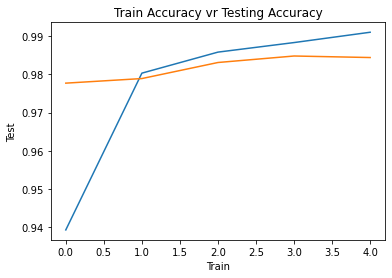

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Train Accuracy vr Testing Accuracy")
plt.xlabel("Train")
plt.ylabel("Test")
plt.show()

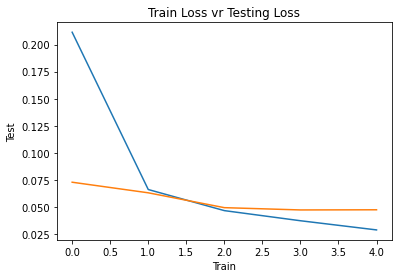

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Train Loss vr Testing Loss")
plt.xlabel("Train")
plt.ylabel("Test")
plt.show()